In [20]:
## CSIS 44620 Web Mining and Applied Natural Language Processing
## homework for Module 6
## Presented by Ramon Torres
## DEC 1, 2022

In [41]:
## 1 Write code that extracts the article html from https://web.archive.org/web/20210327165005/https://hackaday.com/2021/03/22/how-laser-headlights-work/ and dumps it to a .pkl (or other appropriate file)
import requests
import matplotlib.pyplot as plt
import numpy as np
from matplotlib import colors
from matplotlib.ticker import PercentFormatter


response = requests.get('https://web.archive.org/web/20210327165005/https://hackaday.com/2021/03/22/how-laser-headlights-work/')
print(response.status_code)
print(response.headers['content-type'])


200
text/html; charset=UTF-8


In [42]:
from bs4 import BeautifulSoup

parser = 'html.parser'

soup = BeautifulSoup(response.text, parser)


In [43]:
for header in soup.findAll('h1'):
    print('h1 header:', header)
    print('h1 text:', header.text)

h1 header: <h1 class="site-title">
<a href="https://web.archive.org/web/20210327165005/https://hackaday.com/" rel="home">Hackaday</a>
</h1>
h1 text: 
Hackaday

h1 header: <h1 class="entry-title" itemprop="name">How Laser Headlights Work</h1>
h1 text: How Laser Headlights Work
h1 header: <h1 class="screen-reader-text">Post navigation</h1>
h1 text: Post navigation
h1 header: <h1 class="widget-title">Search</h1>
h1 text: Search
h1 header: <h1 class="widget-title">Never miss a hack</h1>
h1 text: Never miss a hack
h1 header: <h1 class="widget-title">Subscribe</h1>
h1 text: Subscribe
h1 header: <h1 class="widget-title">If you missed it</h1>
h1 text: If you missed it
h1 header: <h1 class="widget-title">Our Columns</h1>
h1 text: Our Columns
h1 header: <h1 class="widget-title">Search</h1>
h1 text: Search
h1 header: <h1 class="widget-title">Never miss a hack</h1>
h1 text: Never miss a hack
h1 header: <h1 class="widget-title">Subscribe</h1>
h1 text: Subscribe
h1 header: <h1 class="widget-title">I

In [44]:
##2 Read in your article's html source from the file you created in question 1 and print it's text (use .get_text())
article_page = requests.get('https://web.archive.org/web/20210327165005/https://hackaday.com/2021/03/22/how-laser-headlights-work/')
article_html = article_page.text

import pickle
with open('python-match.pkl', 'wb') as f:
    pickle.dump(article_page.text, f)

In [45]:
with open('python-match.pkl', 'rb') as f:
    article_html = pickle.load(f)

In [46]:
soup = BeautifulSoup(article_html, parser)

In [47]:
article_element = soup.find('article').get_text()


In [48]:
print(article_element).get_text()



How Laser Headlights Work


                130 Comments            

by:
Lewin Day



March 22, 2021








When we think about the onward march of automotive technology, headlights aren’t usually the first thing that come to mind. Engines, fuel efficiency, and the switch to electric power are all more front of mind. However, that doesn’t mean there aren’t thousands of engineers around the world working to improve the state of the art in automotive lighting day in, day out.
Sealed beam headlights gave way to more modern designs once regulations loosened up, while bulbs moved from simple halogens to xenon HIDs and, more recently, LEDs. Now, a new technology is on the scene, with lasers!

Laser Headlights?!
BWM’s prototype laser headlight assemblies undergoing testing.
The first image brought to mind by the phrase “laser headlights” is that of laser beams firing out the front of an automobile. Obviously, coherent beams of monochromatic light would make for poor illumination outside o

AttributeError: 'NoneType' object has no attribute 'get_text'

In [49]:
## 3. Load the article text into a trained spaCy pipeline, and determine the 5 most frequent tokens (converted to lower case). Print the common tokens with an appropriate label. Additionally, print the tokens their frequencies (with appropriate labels). Make sure to remove things we don't care about (punctuation, stopwords, whitespace).
import spacy
from spacytextblob.spacytextblob import SpacyTextBlob
## 4. Load the article text into a trained spaCy pipeline, and determine the 5 most frequent lemmas (converted to lower case). Print the common lemmas with an appropriate label. Additionally, print the lemmas with their frequencies (with appropriate labels). Make sure to remove things we don't care about (punctuation, stopwords, whitespace).

nlp = spacy.load('en_core_web_sm')
nlp.add_pipe('spacytextblob')
doc = nlp(article_element)

## Check for polarity for BONUS Points
print(f'Polarity: {doc._.polarity}')

Polarity: 0.1325758769416858


In [50]:
## 5. Define the following methods:

score_sentence_by_token(sentence, interesting_token) that takes a sentence and a list of interesting token and returns the number of times that any of the interesting words appear in the sentence divided by the number of words in the sentence
score_sentence_by_lemma(sentence, interesting_lemmas) that takes a sentence and a list of interesting lemmas and returns the number of times that any of the interesting lemmas appear in the sentence divided by the number of words in the sentence

for lexeme in doc[:10]: # just the first 10 for now
    print('---',lexeme)

--- 


--- How
--- Laser
--- Headlights
--- Work
--- 


                
--- 130
--- Comments
---            


--- by


In [51]:
non_ws_tokens = []
for token in doc:
    if not token.is_space:
        non_ws_tokens.append(token)
print(non_ws_tokens)

[How, Laser, Headlights, Work, 130, Comments, by, :, Lewin, Day, March, 22, ,, 2021, When, we, think, about, the, onward, march, of, automotive, technology, ,, headlights, are, n’t, usually, the, first, thing, that, come, to, mind, ., Engines, ,, fuel, efficiency, ,, and, the, switch, to, electric, power, are, all, more, front, of, mind, ., However, ,, that, does, n’t, mean, there, are, n’t, thousands, of, engineers, around, the, world, working, to, improve, the, state, of, the, art, in, automotive, lighting, day, in, ,, day, out, ., Sealed, beam, headlights, gave, way, to, more, modern, designs, once, regulations, loosened, up, ,, while, bulbs, moved, from, simple, halogens, to, xenon, HIDs, and, ,, more, recently, ,, LEDs, ., Now, ,, a, new, technology, is, on, the, scene, ,, with, lasers, !, Laser, Headlights, ?, !, BWM, ’s, prototype, laser, headlight, assemblies, undergoing, testing, ., The, first, image, brought, to, mind, by, the, phrase, “, laser, headlights, ”, is, that, of, l

In [52]:
def we_care_about(token):
    return not (token.is_space or token.is_punct)

interesting_tokens = [token for token in doc if we_care_about(token)]
print(interesting_tokens)

[How, Laser, Headlights, Work, 130, Comments, by, Lewin, Day, March, 22, 2021, When, we, think, about, the, onward, march, of, automotive, technology, headlights, are, n’t, usually, the, first, thing, that, come, to, mind, Engines, fuel, efficiency, and, the, switch, to, electric, power, are, all, more, front, of, mind, However, that, does, n’t, mean, there, are, n’t, thousands, of, engineers, around, the, world, working, to, improve, the, state, of, the, art, in, automotive, lighting, day, in, day, out, Sealed, beam, headlights, gave, way, to, more, modern, designs, once, regulations, loosened, up, while, bulbs, moved, from, simple, halogens, to, xenon, HIDs, and, more, recently, LEDs, Now, a, new, technology, is, on, the, scene, with, lasers, Laser, Headlights, BWM, ’s, prototype, laser, headlight, assemblies, undergoing, testing, The, first, image, brought, to, mind, by, the, phrase, laser, headlights, is, that, of, laser, beams, firing, out, the, front, of, an, automobile, Obviousl

In [53]:
from collections import Counter
word_freq = Counter(map(str,interesting_tokens))
print(word_freq.most_common(10))

[('the', 68), ('to', 37), ('of', 36), ('laser', 29), ('in', 24), ('a', 24), ('and', 18), ('headlights', 17), ('that', 13), ('’s', 13)]


In [54]:
import matplotlib.pyplot as plt
import numpy as np
from matplotlib import colors
from matplotlib.ticker import PercentFormatter

In [55]:
def we_care_about(token):
    return not (token.is_space or token.is_punct or token.is_stop)

interesting_tokens = [token for token in doc if we_care_about(token)]
word_freq = Counter(map(str,interesting_tokens))
print(word_freq.most_common(10))

[('laser', 29), ('headlights', 17), ('technology', 10), ('headlight', 10), ('LED', 10), ('light', 9), ('high', 8), ('beam', 7), ('Laser', 6), ('automotive', 6)]


In [69]:
interesting_lemmas = [token.lemma_ for token in doc if we_care_about(token)]
lemma_freq = Counter(interesting_lemmas)
print(lemma_freq.most_common(10))

[('laser', 34), ('headlight', 27), ('beam', 12), ('led', 11), ('technology', 10), ('light', 10), ('high', 9), ('come', 7), ('Laser', 6), ('automotive', 6)]


(array([[2., 0., 0., 0., 0., 0., 0., 0., 0., 0.],
        [0., 2., 0., 0., 0., 0., 0., 0., 0., 0.],
        [0., 0., 1., 1., 0., 0., 0., 0., 0., 0.],
        [0., 0., 0., 2., 0., 0., 0., 0., 0., 0.],
        [0., 0., 0., 1., 1., 0., 0., 0., 0., 0.],
        [0., 0., 0., 0., 0., 2., 0., 0., 0., 0.],
        [0., 0., 0., 0., 0., 0., 2., 0., 0., 0.],
        [0., 0., 0., 0., 0., 0., 0., 1., 1., 0.],
        [0., 0., 0., 0., 0., 0., 0., 0., 1., 1.],
        [0., 0., 0., 0., 0., 0., 0., 0., 0., 2.]]),
 array([ 0. ,  1.6,  3.2,  4.8,  6.4,  8. ,  9.6, 11.2, 12.8, 14.4, 16. ]),
 <a list of 10 BarContainer objects>)

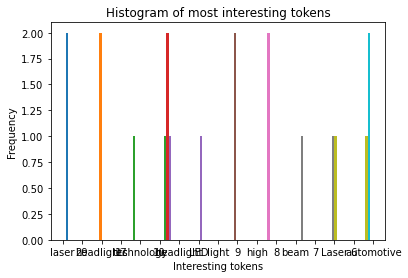

In [70]:
## 6. Make a list containing the scores (using tokens) of every sentence in the article, and plot a histogram with appropriate titles and axis labels of the scores. From your histogram, what seems to be the most common range of scores (put the answer in a comment after your code)?
plt.xlabel('Interesting tokens')
plt.ylabel('Frequency')
plt.title('Histogram of most interesting tokens')
plt.hist(word_freq.most_common(10))

(array([[2., 0., 0., 0., 0., 0., 0., 0., 0., 0.],
        [0., 2., 0., 0., 0., 0., 0., 0., 0., 0.],
        [0., 0., 2., 0., 0., 0., 0., 0., 0., 0.],
        [0., 0., 0., 1., 1., 0., 0., 0., 0., 0.],
        [0., 0., 0., 0., 1., 1., 0., 0., 0., 0.],
        [0., 0., 0., 0., 0., 2., 0., 0., 0., 0.],
        [0., 0., 0., 0., 0., 0., 1., 1., 0., 0.],
        [0., 0., 0., 0., 0., 0., 0., 1., 1., 0.],
        [0., 0., 0., 0., 0., 0., 0., 0., 1., 1.],
        [0., 0., 0., 0., 0., 0., 0., 0., 0., 2.]]),
 array([ 0. ,  1.7,  3.4,  5.1,  6.8,  8.5, 10.2, 11.9, 13.6, 15.3, 17. ]),
 <a list of 10 BarContainer objects>)

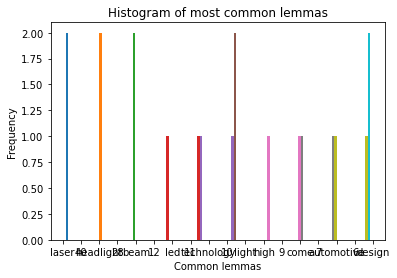

In [67]:
## 7. Make a list containing the scores (using lemmas) of every sentence in the article, and plot a histogram with appropriate titles and axis labels of the scores. From your histogram, what seems to be the most common range of scores (put the answer in a comment after your code)?
plt.xlabel('Common lemmas')
plt.ylabel('Frequency')
plt.title('Histogram of most common lemmas')
plt.hist(lemma_freq.most_common(10))

In [72]:
interesting_lemmas = [token.lemma_.lower() for token in doc if we_care_about(token)]
lemma_freq = Counter(interesting_lemmas)
print(lemma_freq.most_common(10))

[('laser', 40), ('headlight', 28), ('beam', 12), ('led', 11), ('technology', 10), ('light', 10), ('high', 9), ('come', 7), ('automotive', 6), ('design', 6)]


(array([[2., 0., 0., 0., 0., 0., 0., 0., 0., 0.],
        [0., 2., 0., 0., 0., 0., 0., 0., 0., 0.],
        [0., 0., 2., 0., 0., 0., 0., 0., 0., 0.],
        [0., 0., 0., 1., 1., 0., 0., 0., 0., 0.],
        [0., 0., 0., 0., 1., 1., 0., 0., 0., 0.],
        [0., 0., 0., 0., 0., 2., 0., 0., 0., 0.],
        [0., 0., 0., 0., 0., 0., 1., 1., 0., 0.],
        [0., 0., 0., 0., 0., 0., 0., 1., 1., 0.],
        [0., 0., 0., 0., 0., 0., 0., 0., 1., 1.],
        [0., 0., 0., 0., 0., 0., 0., 0., 0., 2.]]),
 array([ 0. ,  1.7,  3.4,  5.1,  6.8,  8.5, 10.2, 11.9, 13.6, 15.3, 17. ]),
 <a list of 10 BarContainer objects>)

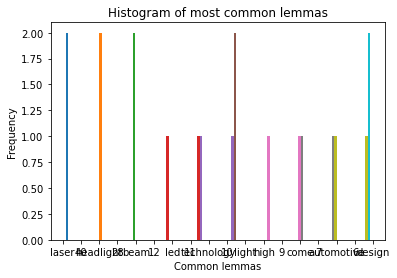

In [73]:
## 7. Make a list containing the scores (using lemmas) of every sentence in the article, and plot a histogram with appropriate titles and axis labels of the scores. From your histogram, what seems to be the most common range of scores (put the answer in a comment after your code)?
plt.xlabel('Common lemmas')
plt.ylabel('Frequency')
plt.title('Histogram of most common lemmas')
plt.hist(lemma_freq.most_common(10))

In [74]:
cool_words = set()
for lemma, freq in lemma_freq.most_common(5):
    cool_words.add(lemma)
print(cool_words)

{'technology', 'laser', 'beam', 'led', 'headlight'}


In [38]:
sentences = list(doc.sents) 
for sentence in sentences:
    count = 0
    for token in sentence:
        if token.lemma_.lower() in cool_words:
            count += 1
    sent_str = str(sentence).replace('\n','').replace('  ',' ')
    print(count,':', sent_str)

1 : How Laser Headlights Work        130 Comments      by:Lewin DayMarch 22, 2021
2 : When we think about the onward march of automotive technology, headlights aren’t usually the first thing that come to mind.
0 : Engines, fuel efficiency, and the switch to electric power are all more front of mind.
0 : However, that doesn’t mean there aren’t thousands of engineers around the world working to improve the state of the art in automotive lighting day in, day out.
3 : Sealed beam headlights gave way to more modern designs once regulations loosened up, while bulbs moved from simple halogens to xenon HIDs and, more recently, LEDs.
2 : Now, a new technology is on the scene, with lasers!
1 : Laser Headlights?!
2 : BWM’s prototype laser headlight assemblies undergoing testing.
4 : The first image brought to mind by the phrase “laser headlights” is that of laser beams firing out the front of an automobile.
1 : Obviously, coherent beams of monochromatic light would make for poor illumination outs

In [39]:
def sentence_length (sent):
    count = 0
    for token in sent:
        if not(token.is_space or token.is_punct):
            count += 1
    return count
print(sentence_length(sentences[0]), sentences[0])

12 

How Laser Headlights Work


                130 Comments            

by:
Lewin Day



March 22, 2021











In [ ]:
## 8 Which tokens and lexems would be ommitted from the lists generated in questions 3 and 4 if we only wanted to consider nouns as interesting words? How might we change the code to only consider nouns? Put your answer in this Markdown cell (you can edit it by double clicking it).

In [86]:
## Will need to tokenize using  nlkt, while searching some additional sources, 
## Pythons NLTK or ToolKit has a number of functions that allow us to extract various information from a text. found nltk to segragate nouns in a sentence for example:
## Sample code
import nltk
lines = 'Natural processinng language applications are useful'
# function to test if something is a noun
is_noun = lambda pos: pos[:2] == 'NN'
# do the nlp stuff
tokenized = nltk.word_tokenize(lines)
nouns = [word for (word, pos) in nltk.pos_tag(tokenized) if is_noun(pos)] 

print(nouns)


['Natural', 'processinng', 'language', 'applications']
